# Boston Housing using Linear Regression/SGD in PyTorch

Dataset information available here: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
s = ""

with open('./data/boston.txt', 'r') as f:
    s = f.read()
    
print(s[:2000])

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        100

In [3]:
data = s.split('\n')
header=data[:21]


In [7]:
nums = data[21:]

nums = [s.split() for s in nums]
nums = nums[1:]
numsd = []

for i in np.arange(0, len(nums) - 1, 2):
    first = nums[i]
    second = nums[i+1] 
    
    first.extend(second)
    numsd.append(first)    

df = pd.DataFrame(numsd, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
                                    'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 
                                    'B', 'LSTAT', 'MEDV'])
df = df.apply(pd.to_numeric)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [50]:
from pycaret.regression import *

regr = setup(df, target='MEDV', numeric_features=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
                                    'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 
                                    'B', 'LSTAT'], 
      normalize=True, remove_outliers=True, remove_multicollinearity=True, 
      feature_selection=True, use_gpu=True)

,Description,Value
0,session_id,4645
1,Target,MEDV
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,13
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(336, 10)"


In [118]:
X_train = regr[25][1][1]
y_train = regr[25][2][1]
X_test = regr[25][3][1]
y_test = regr[25][4][1]

display(X_train, y_train)


,RM,PTRATIO,B,NOX,AGE,CRIM,DIS,INDUS,LSTAT,TAX
70,0.163515,0.301693,0.299173,-1.286730,-2.234587,-0.411971,0.746016,-0.078315,-0.842449,-0.632230
178,0.781190,-0.894163,0.381171,-0.428572,0.183918,-0.414476,-0.397203,-1.052989,-0.814203,-0.684270
266,0.995912,-2.549963,0.302870,0.783466,0.547764,-0.331948,-0.774291,-1.064524,0.297283,-0.869298
23,-0.678642,1.129592,0.416733,-0.180856,1.097100,-0.308687,0.171467,-0.463282,1.016146,-0.620666
94,-0.070727,-0.158252,0.442399,-0.835534,0.287365,-0.417170,-0.059972,0.531578,-0.295886,-0.834605
...,...,...,...,...,...,...,...,...,...,...
175,0.343380,-0.894163,0.377800,-0.428572,-1.289301,-0.414451,-0.292616,-1.052989,-1.038759,-0.684270
500,-0.380262,0.301693,0.442399,0.234952,0.372975,-0.396352,-0.598230,-0.239799,0.232316,-0.134966
470,-0.185060,0.761637,0.442399,0.190718,0.526361,0.076873,-0.340283,0.972777,0.509129,1.455124
72,-0.327278,0.301693,0.377256,-1.286730,-2.191781,-0.411583,0.746016,-0.078315,-1.011926,-0.632230


70     24.200001
178    29.900000
266    30.700001
23     14.500000
94     20.600000
         ...    
175    29.400000
500    16.799999
470    19.900000
72     22.799999
117    19.200001
Name: MEDV, Length: 336, dtype: float32

In [119]:
top = compare_models(turbo=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1356,9.2818,2.9761,0.8827,0.1405,0.1106,0.3920
gbr,Gradient Boosting Regressor,2.1725,9.5447,2.9653,0.8809,0.1434,0.1158,0.0560
catboost,CatBoost Regressor,2.1663,9.5843,3.0330,0.8780,0.1423,0.1117,0.5750
rf,Random Forest Regressor,2.2636,10.9020,3.1962,0.8655,0.1504,0.1181,0.3300
ada,AdaBoost Regressor,2.6555,12.2828,3.4493,0.8437,0.1695,0.1420,0.0500
lightgbm,Light Gradient Boosting Machine,2.5402,14.3275,3.6550,0.8219,0.1658,0.1300,0.0640
knn,K Neighbors Regressor,2.7296,18.1449,4.0291,0.7865,0.1634,0.1271,0.0360
mlp,MLP Regressor,3.0282,18.7063,4.2142,0.7655,0.2006,0.1543,0.4570
dt,Decision Tree Regressor,3.0353,21.7879,4.4547,0.7231,0.1950,0.1587,0.0050
ard,Automatic Relevance Determination,3.4097,26.2789,4.8985,0.6904,0.2728,0.1720,0.0050


In [279]:
X_train_sub = X_train.copy()#[['LSTAT', 'RM']]

X = X_train_sub.values.astype(np.float32)
y = y_train.values.astype(np.float32)

In [280]:
class MLP(nn.Module):
    '''
    Multilayer Perceptron.
    '''
    def __init__(self, input_size, l1_size, l2_size):
        self.input_size = input_size
        self.l1_size = l1_size
        self.l2_size = l2_size
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, l1_size),
            nn.Mish(),
            nn.Linear(l1_size, l2_size),
            nn.Mish(),
            nn.Linear(l2_size, 1)
        )


    def forward(self, x):
        '''Forward pass'''
        return self.layers(x)

In [281]:
class Feedforward(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(Feedforward, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.relu = torch.nn.ReLU()
            self.fc2 = torch.nn.Linear(self.hidden_size, 1)
            # self.sigmoid = torch.nn.Sigmoid()
        def forward(self, x):
            hidden = self.fc1(x)
            relu = self.relu(hidden)
            output = self.fc2(relu)
            # output = self.sigmoid(output)
            return output

In [282]:
import torch.nn as nn

# model=Feedforward(10, 10)

model = MLP(10,10,2)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

inputs = torch.from_numpy(X)
targets = torch.from_numpy(y)


In [283]:
n_epochs = 200
losses = []
model.train()
for it in range(n_epochs):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs.squeeze(), targets)
    losses.append(loss.item())
    
    loss.backward()
    optimizer.step()
    
    print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/200, Loss: 583.0569
Epoch 2/200, Loss: 554.9669
Epoch 3/200, Loss: 514.6564
Epoch 4/200, Loss: 463.2956
Epoch 5/200, Loss: 382.8512
Epoch 6/200, Loss: 204.0738
Epoch 7/200, Loss: 185.5189
Epoch 8/200, Loss: 197.5742
Epoch 9/200, Loss: 210.1815
Epoch 10/200, Loss: 172.2791
Epoch 11/200, Loss: 77.2894
Epoch 12/200, Loss: 70.8846
Epoch 13/200, Loss: 82.5994
Epoch 14/200, Loss: 48.0528
Epoch 15/200, Loss: 42.5744
Epoch 16/200, Loss: 43.8843
Epoch 17/200, Loss: 30.7402
Epoch 18/200, Loss: 25.9456
Epoch 19/200, Loss: 26.0726
Epoch 20/200, Loss: 21.0272
Epoch 21/200, Loss: 22.1612
Epoch 22/200, Loss: 18.4702
Epoch 23/200, Loss: 19.3535
Epoch 24/200, Loss: 17.1935
Epoch 25/200, Loss: 17.3475
Epoch 26/200, Loss: 16.2900
Epoch 27/200, Loss: 16.1999
Epoch 28/200, Loss: 15.6912
Epoch 29/200, Loss: 15.4610
Epoch 30/200, Loss: 15.1821
Epoch 31/200, Loss: 14.8837
Epoch 32/200, Loss: 14.6785
Epoch 33/200, Loss: 14.4026
Epoch 34/200, Loss: 14.2185
Epoch 35/200, Loss: 13.9888
Epoch 36/200, Loss:

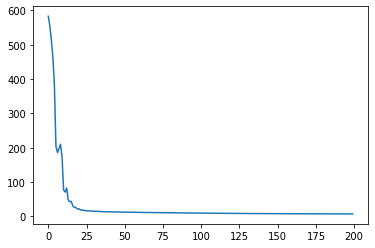

In [284]:
plt.plot(losses)

In [285]:
X_test_sub = X_test.copy() #[['LSTAT', 'RM']]
X_test_np = X_test_sub.values.astype(np.float32)
y_test_np = y_test.values.astype(np.float32)

X_test_torch = torch.from_numpy(X_test_np)
y_test_torch = torch.from_numpy(y_test_np)

In [286]:
predicted = model(X_test_torch).detach().numpy()
# plt.plot(X, y, 'ro', label='Original Data')
# plt.plot(X, predicted, label='Fitted Data')
# plt.legend()
# plt.show()

In [287]:
predicted[:5]

array([[20.663795],
       [22.584719],
       [22.991228],
       [24.681324],
       [20.458572]], dtype=float32)

In [288]:
from sklearn.metrics import r2_score

r2_score(y_test_np, predicted)

0.8542627052970183

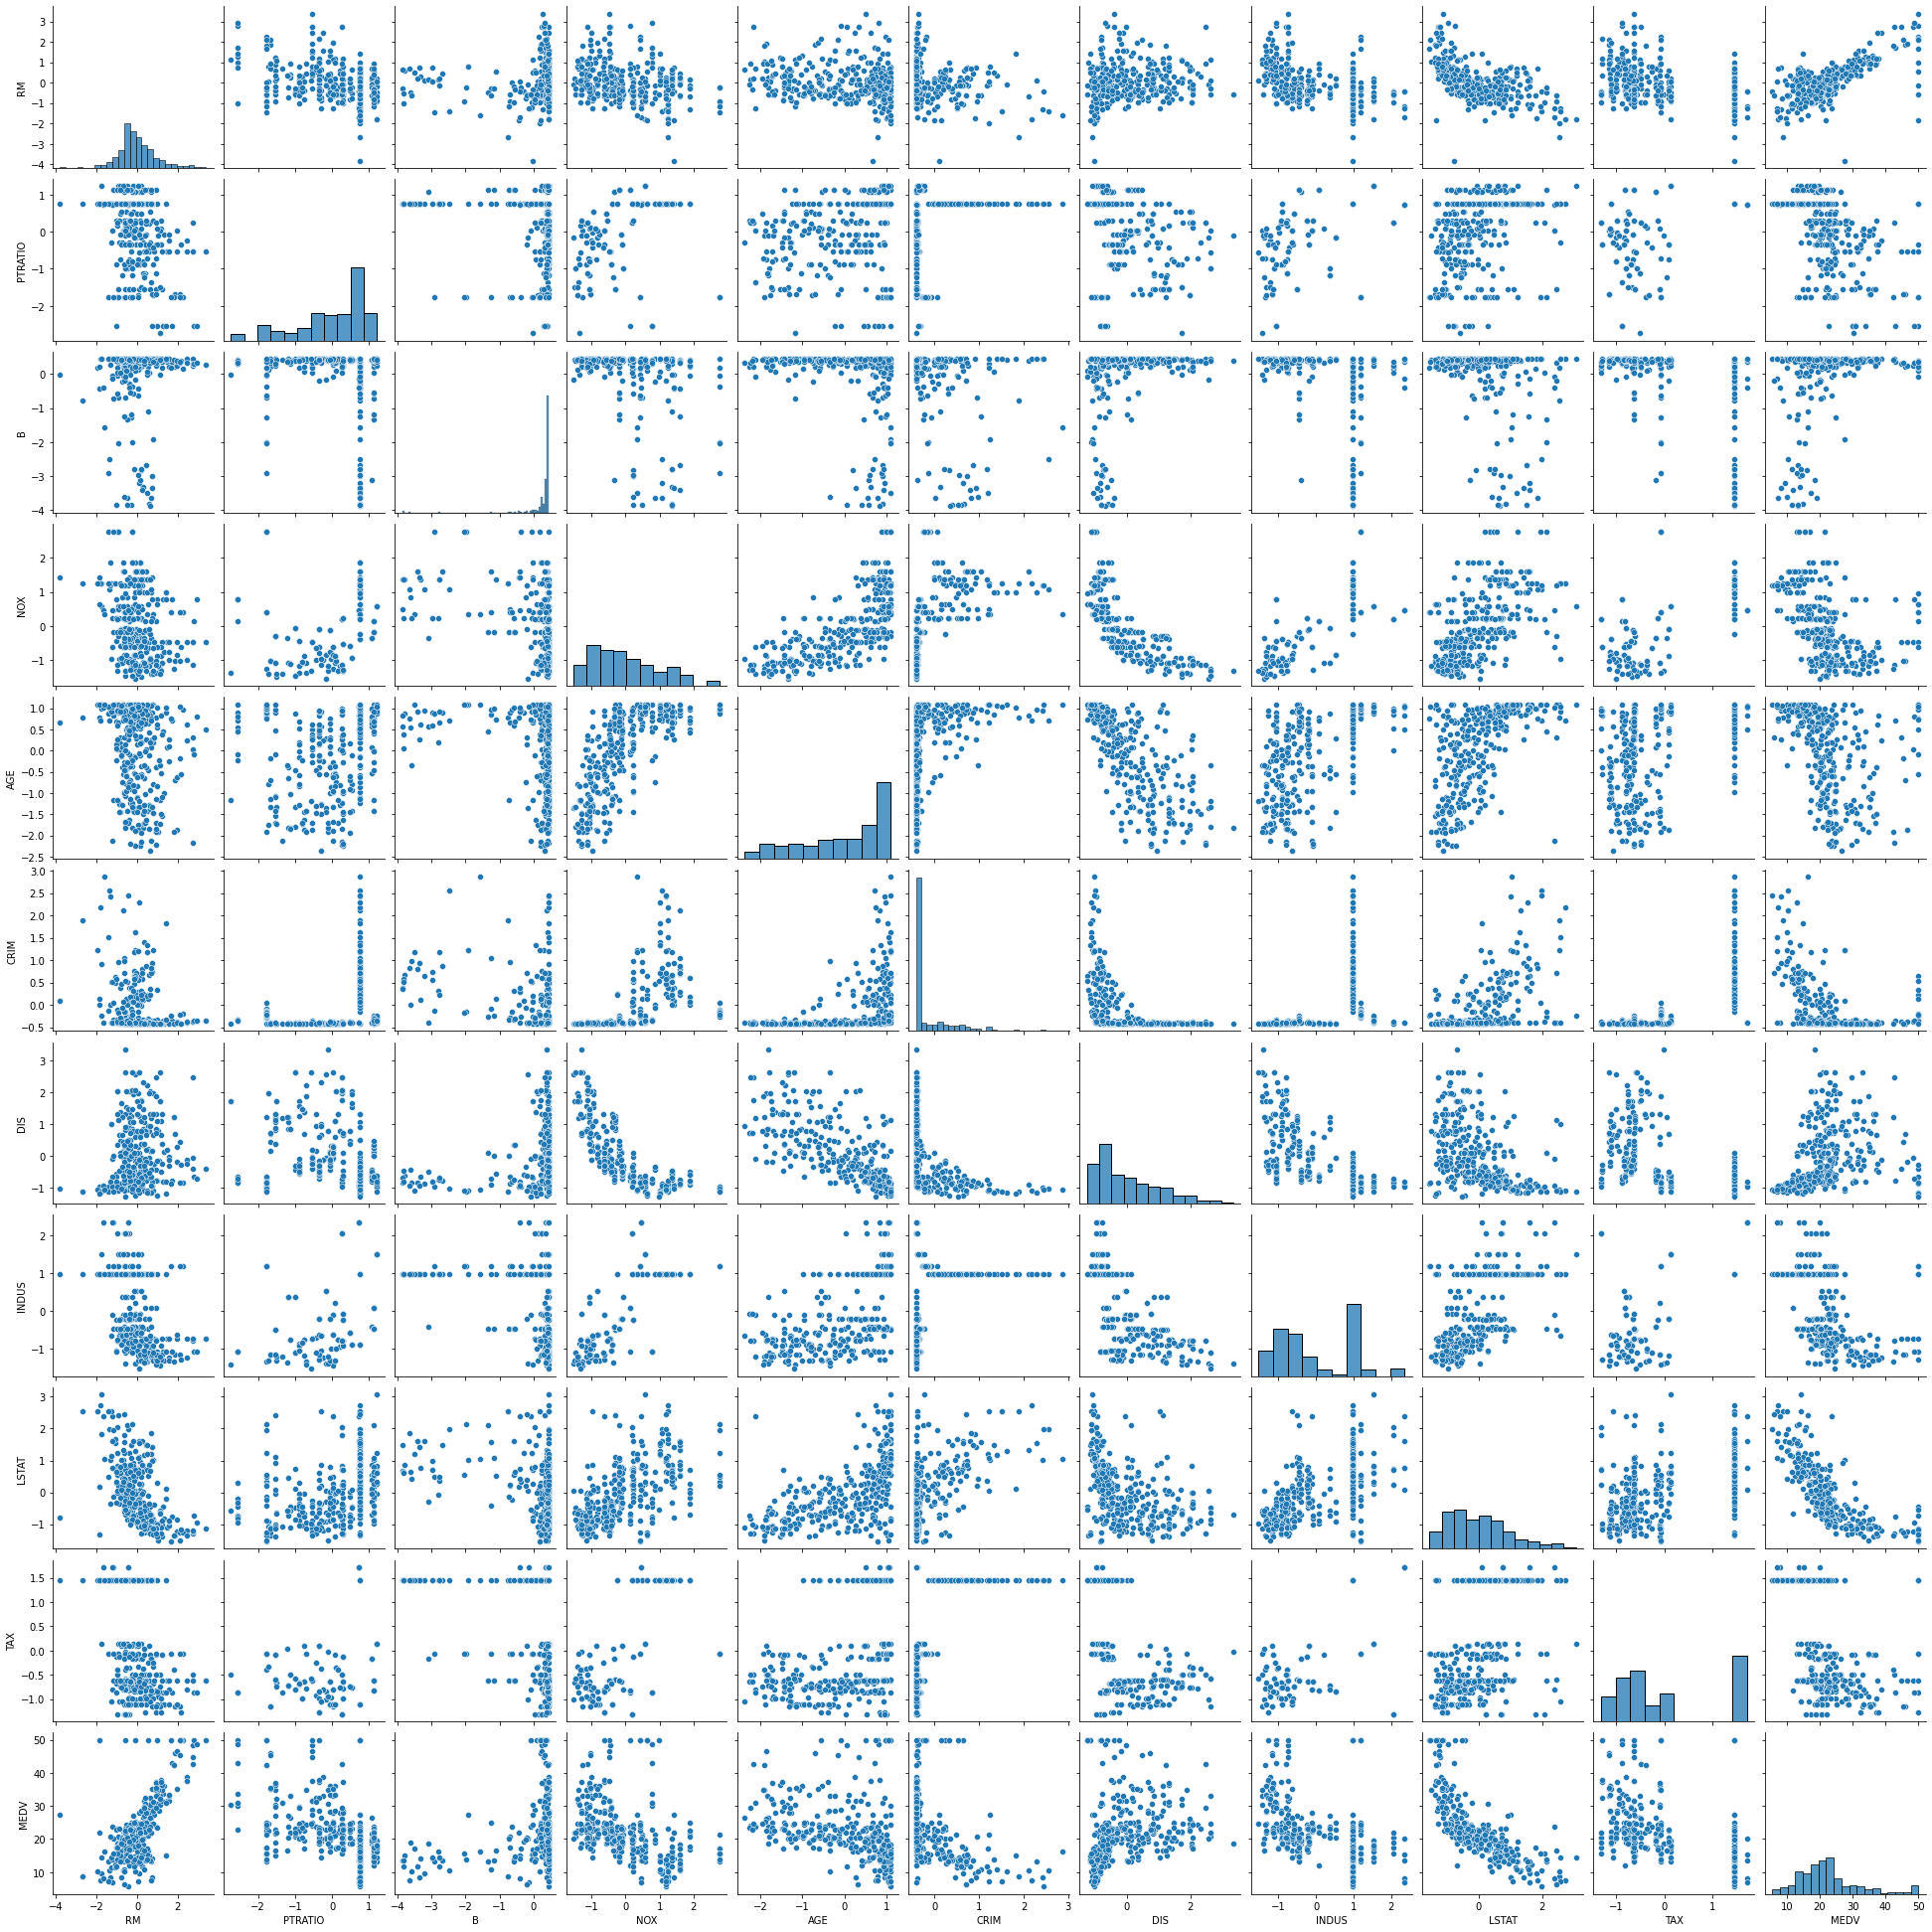

In [154]:
import seaborn as sns

data = X_train.copy()
data['MEDV'] = y_train
sns.pairplot(data)